In [1]:
import numpy as np
import pandas as pd

In [2]:
df_floor = pd.read_excel('use_data/침수관련_데이터.xlsx')
df_accident = pd.read_excel('use_data/교통사고_데이터.xlsx')

print(df_floor.shape, df_accident.shape)

(11500, 16) (11500, 5)


# 전처리

In [3]:
print(df_floor.info())
df_floor.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   자치구(구)            11500 non-null  object 
 1   날짜                11500 non-null  int64  
 2   1hr 최대 강수량(mm)    11500 non-null  float64
 3   일평균 강수량(mm)       11500 non-null  float64
 4   경사도(˚)            11500 non-null  float64
 5   해발고도(m)           11500 non-null  float64
 6   불투수면(%)           11500 non-null  float64
 7   녹지 면적율(%)         11500 non-null  float64
 8   하천 면적율(%)         11500 non-null  float64
 9   복개하천 개수(개)        11500 non-null  int64  
 10  맨홀 개수(개)          11500 non-null  int64  
 11  빗물받이 개수(개)        11500 non-null  int64  
 12  빗물 펌프 개수(개)       11500 non-null  int64  
 13  [AVG] 하수관로 비율(%)  11500 non-null  object 
 14  [MAX] 하수관로 비율(%)  11500 non-null  object 
 15  침수 피해(0/1)        11500 non-null  int64  
dtypes: float64(7), int64(6), object(3)
memor

,자치구(구),날짜,1hr 최대 강수량(mm),일평균 강수량(mm),경사도(˚),해발고도(m),불투수면(%),녹지 면적율(%),하천 면적율(%),복개하천 개수(개),맨홀 개수(개),빗물받이 개수(개),빗물 펌프 개수(개),[AVG] 하수관로 비율(%),[MAX] 하수관로 비율(%),침수 피해(0/1)
0,종로,20180601,0.0,0.0,12.033665,146.699945,0.42017,0.009418,0.011652,1,9854,16173,0,0.009084,0.033333,0
1,종로,20180602,0.0,0.0,12.033665,146.699945,0.42017,0.009418,0.011652,1,9854,16173,0,0.008864,0.033333,0
2,종로,20180603,0.0,0.0,12.033665,146.699945,0.42017,0.009418,0.011652,1,9854,16173,0,0.008182,0.033333,0
3,종로,20180604,0.0,0.0,12.033665,146.699945,0.42017,0.009418,0.011652,1,9854,16173,0,0.008745,0.033333,0
4,종로,20180605,0.0,0.0,12.033665,146.699945,0.42017,0.009418,0.011652,1,9854,16173,0,0.008753,0.033333,0


In [4]:
cols = ['자치구', '날짜', '1hr_최대강수량', '일평균강수량', '경사도', '해발고도', '불투수면',
       '녹지면적율', '하천면적율', '복개하천개수', '맨홀개수', '빗물받이개수',
       '빗물펌프개수', 'AVG_하수관로비율', 'MAX_하수관로비율', '침수피해']

df_floor.columns = cols

In [5]:
print(df_accident.info())
df_accident.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   자치구               11500 non-null  object
 1   날짜                11500 non-null  int64 
 2   [AVG] 하수관로 비율(%)  11500 non-null  object
 3   [MAX] 하수관로 비율(%)  11500 non-null  object
 4   사고[건]             11500 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 449.3+ KB
None


,자치구,날짜,[AVG] 하수관로 비율(%),[MAX] 하수관로 비율(%),사고[건]
0,종로,20180601,0.009084,0.033333,4
1,종로,20180602,0.008864,0.033333,4
2,종로,20180603,0.008182,0.033333,3
3,종로,20180604,0.008745,0.033333,2
4,종로,20180605,0.008753,0.033333,8


In [6]:
cols2 = ['자치구', '날짜', 'AVG_하수관로비율', 'MAX_하수관로비율', '사고건수']
df_accident.columns = cols2

In [7]:
df_floor['날짜'] = pd.to_datetime(df_floor['날짜'], format='%Y%m%d')
df_floor.loc[df_floor['AVG_하수관로비율'] == 'na', 'AVG_하수관로비율'] = np.NaN
df_floor.loc[df_floor['MAX_하수관로비율'] == 'na', 'MAX_하수관로비율'] = np.NaN

df_accident['날짜'] = pd.to_datetime(df_accident['날짜'], format='%Y%m%d')
df_accident.loc[df_accident['AVG_하수관로비율'] == 'na', 'AVG_하수관로비율'] = np.NaN
df_accident.loc[df_accident['MAX_하수관로비율'] == 'na', 'MAX_하수관로비율'] = np.NaN

In [8]:
df_floor['AVG_하수관로비율'] = df_floor['AVG_하수관로비율'].astype('float')
df_floor['MAX_하수관로비율'] = df_floor['MAX_하수관로비율'].astype('float')

df_accident['AVG_하수관로비율'] = df_accident['AVG_하수관로비율'].astype('float')
df_accident['MAX_하수관로비율'] = df_accident['MAX_하수관로비율'].astype('float')

In [9]:
df_floor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   자치구         11500 non-null  object        
 1   날짜          11500 non-null  datetime64[ns]
 2   1hr_최대강수량   11500 non-null  float64       
 3   일평균강수량      11500 non-null  float64       
 4   경사도         11500 non-null  float64       
 5   해발고도        11500 non-null  float64       
 6   불투수면        11500 non-null  float64       
 7   녹지면적율       11500 non-null  float64       
 8   하천면적율       11500 non-null  float64       
 9   복개하천개수      11500 non-null  int64         
 10  맨홀개수        11500 non-null  int64         
 11  빗물받이개수      11500 non-null  int64         
 12  빗물펌프개수      11500 non-null  int64         
 13  AVG_하수관로비율  11349 non-null  float64       
 14  MAX_하수관로비율  11349 non-null  float64       
 15  침수피해        11500 non-null  int64         
dtypes: datetime64[ns](1), 

In [10]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   자치구         11500 non-null  object        
 1   날짜          11500 non-null  datetime64[ns]
 2   AVG_하수관로비율  11349 non-null  float64       
 3   MAX_하수관로비율  11349 non-null  float64       
 4   사고건수        11500 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 449.3+ KB


In [11]:
# null값 제거
df_floor = df_floor.dropna(axis=0, how='any')
df_accident = df_accident.dropna(axis=0, how='any')

In [12]:
print(df_floor.isna().sum(), '\n\n', df_accident.isna().sum())

자치구           0
날짜            0
1hr_최대강수량     0
일평균강수량        0
경사도           0
해발고도          0
불투수면          0
녹지면적율         0
하천면적율         0
복개하천개수        0
맨홀개수          0
빗물받이개수        0
빗물펌프개수        0
AVG_하수관로비율    0
MAX_하수관로비율    0
침수피해          0
dtype: int64 

 자치구           0
날짜            0
AVG_하수관로비율    0
MAX_하수관로비율    0
사고건수          0
dtype: int64


In [13]:
# df_floor['year'] = df_floor['날짜'].dt.year
df_floor['month'] = df_floor['날짜'].dt.month
df_floor['day'] = df_floor['날짜'].dt.day

# df_accident['year'] = df_accident['날짜'].dt.year
df_accident['month'] = df_accident['날짜'].dt.month
df_accident['day'] = df_accident['날짜'].dt.day

In [14]:
del df_floor['날짜']
del df_accident['날짜']

# 스케일링

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

col = ['1hr_최대강수량', '일평균강수량', '경사도', '해발고도', '불투수면', '녹지면적율', '하천면적율', '복개하천개수', 
          '맨홀개수', '빗물받이개수', '빗물펌프개수', 'AVG_하수관로비율', 'MAX_하수관로비율']

col2 = ['AVG_하수관로비율', 'MAX_하수관로비율', '사고건수']

stand_scale = StandardScaler()
minmax_scale = MinMaxScaler()
df_floor_standard = df_floor.copy()
df_floor_minmax = df_floor.copy()
df_accident_standard = df_accident.copy()
df_accident_minmax = df_accident.copy()

df_floor_standard[col] = stand_scale.fit_transform(df_floor_standard[col])
df_floor_minmax[col] = minmax_scale.fit_transform(df_floor_minmax[col])

df_accident_standard[col2] = stand_scale.fit_transform(df_accident_standard[col2])
df_accident_minmax[col2] = minmax_scale.fit_transform(df_accident_minmax[col2])

In [16]:
df_floor_minmax.head()

,자치구,1hr_최대강수량,일평균강수량,경사도,해발고도,불투수면,녹지면적율,하천면적율,복개하천개수,맨홀개수,빗물받이개수,빗물펌프개수,AVG_하수관로비율,MAX_하수관로비율,침수피해,month,day
0,종로,0.0,0.0,0.883197,0.770065,0.15067,0.079188,0.026666,0.25,0.396268,0.219224,0.0,0.005219,0.000816,0,6,1
1,종로,0.0,0.0,0.883197,0.770065,0.15067,0.079188,0.026666,0.25,0.396268,0.219224,0.0,0.005093,0.000816,0,6,2
2,종로,0.0,0.0,0.883197,0.770065,0.15067,0.079188,0.026666,0.25,0.396268,0.219224,0.0,0.004701,0.000816,0,6,3
3,종로,0.0,0.0,0.883197,0.770065,0.15067,0.079188,0.026666,0.25,0.396268,0.219224,0.0,0.005025,0.000816,0,6,4
4,종로,0.0,0.0,0.883197,0.770065,0.15067,0.079188,0.026666,0.25,0.396268,0.219224,0.0,0.005029,0.000816,0,6,5


In [17]:
# One-Hot encoding
df_floor_onehot = pd.get_dummies(df_floor_minmax)
df_floor_onehot.head()

,1hr_최대강수량,일평균강수량,경사도,해발고도,불투수면,녹지면적율,하천면적율,복개하천개수,맨홀개수,빗물받이개수,...,자치구_성동,자치구_성북,자치구_송파,자치구_양천,자치구_영등포,자치구_용산,자치구_은평,자치구_종로,자치구_중,자치구_중랑
0,0.0,0.0,0.883197,0.770065,0.15067,0.079188,0.026666,0.25,0.396268,0.219224,...,False,False,False,False,False,False,False,True,False,False
1,0.0,0.0,0.883197,0.770065,0.15067,0.079188,0.026666,0.25,0.396268,0.219224,...,False,False,False,False,False,False,False,True,False,False
2,0.0,0.0,0.883197,0.770065,0.15067,0.079188,0.026666,0.25,0.396268,0.219224,...,False,False,False,False,False,False,False,True,False,False
3,0.0,0.0,0.883197,0.770065,0.15067,0.079188,0.026666,0.25,0.396268,0.219224,...,False,False,False,False,False,False,False,True,False,False
4,0.0,0.0,0.883197,0.770065,0.15067,0.079188,0.026666,0.25,0.396268,0.219224,...,False,False,False,False,False,False,False,True,False,False


In [18]:
# One-Hot encoding
df_accident_onehot = pd.get_dummies(df_accident_minmax)
df_accident_onehot.head()

,AVG_하수관로비율,MAX_하수관로비율,사고건수,month,day,자치구_강남,자치구_강동,자치구_강북,자치구_강서,자치구_관악,...,자치구_성동,자치구_성북,자치구_송파,자치구_양천,자치구_영등포,자치구_용산,자치구_은평,자치구_종로,자치구_중,자치구_중랑
0,0.005219,0.000816,0.166667,6,1,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.005093,0.000816,0.166667,6,2,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.004701,0.000816,0.125000,6,3,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.005025,0.000816,0.083333,6,4,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0.005029,0.000816,0.333333,6,5,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [19]:
df_floor_label = df_floor_minmax.copy()
df_accident_label = df_accident_minmax.copy()
print(df_floor_minmax['자치구'].astype('category').cat.categories)
df_floor_label['자치구'] = df_floor_label['자치구'].astype('category').cat.codes
df_accident_label['자치구'] = df_accident_label['자치구'].astype('category').cat.codes

Index(['강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '노원', '도봉', '동대문', '동작',
       '마포', '서대문', '서초', '성동', '성북', '송파', '양천', '영등포', '용산', '은평', '종로', '중',
       '중랑'],
      dtype='object')


# Modeling

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## 침수여부 (0/1) 예측

### onehot encoding - RandomForestClassifier

In [21]:
df_floor_onehot_x = df_floor_onehot.iloc[:, [i for i in range(40) if i != 13]]
df_floor_onehot_y = df_floor_onehot.iloc[:, 13]
print(df_floor_onehot_x.shape, df_floor_onehot_y.shape)

(11349, 39) (11349,)


In [22]:
train_x, test_x, train_y, test_y = train_test_split(df_floor_onehot_x, df_floor_onehot_y, test_size=0.2, random_state=0, shuffle=True)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(9079, 39) (2270, 39) (9079,) (2270,)


In [23]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9079 entries, 1489 to 2781
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   1hr_최대강수량   9079 non-null   float64
 1   일평균강수량      9079 non-null   float64
 2   경사도         9079 non-null   float64
 3   해발고도        9079 non-null   float64
 4   불투수면        9079 non-null   float64
 5   녹지면적율       9079 non-null   float64
 6   하천면적율       9079 non-null   float64
 7   복개하천개수      9079 non-null   float64
 8   맨홀개수        9079 non-null   float64
 9   빗물받이개수      9079 non-null   float64
 10  빗물펌프개수      9079 non-null   float64
 11  AVG_하수관로비율  9079 non-null   float64
 12  MAX_하수관로비율  9079 non-null   float64
 13  month       9079 non-null   int32  
 14  day         9079 non-null   int32  
 15  자치구_강남      9079 non-null   bool   
 16  자치구_강동      9079 non-null   bool   
 17  자치구_강북      9079 non-null   bool   
 18  자치구_강서      9079 non-null   bool   
 19  자치구_관악      9079 non-null   b

In [24]:
model = RandomForestClassifier(random_state=0)
model.fit(train_x, train_y)
predict_y = model.predict(test_x)
accuracy_score(test_y, predict_y)

1.0

### Label encoding - RandomForestClassifier

In [25]:
df_floor_label_x = df_floor_label.iloc[:, [i for i in range(17) if i != 14]]
df_floor_label_y = df_floor_label.iloc[:, 14]
print(df_floor_label_x.shape, df_floor_label_y.shape)

train_x, test_x, train_y, test_y = train_test_split(df_floor_label_x, df_floor_label_y, test_size=0.2, random_state=0, shuffle=True)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

model = RandomForestClassifier(random_state=0)
model.fit(train_x, train_y)
predict_y = model.predict(test_x)
print(accuracy_score(test_y, predict_y))

(11349, 16) (11349,)
(9079, 16) (2270, 16) (9079,) (2270,)
1.0


### one-hot encoding - lgbmclassifier

In [26]:
df_floor_onehot_x = df_floor_onehot.iloc[:, [i for i in range(40) if i != 13]]
df_floor_onehot_y = df_floor_onehot.iloc[:, 13]
print(df_floor_onehot_x.shape, df_floor_onehot_y.shape)

train_x, test_x, train_y, test_y = train_test_split(df_floor_onehot_x, df_floor_onehot_y, test_size=0.2, random_state=0, shuffle=True)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

model = LGBMClassifier(random_state=0, force_col_wise=True)
model.fit(train_x, train_y)
predict_y = model.predict(test_x)
print(accuracy_score(test_y, predict_y))

(11349, 39) (11349,)
(9079, 39) (2270, 39) (9079,) (2270,)
[LightGBM] [Info] Number of positive: 973, number of negative: 8106
[LightGBM] [Info] Total Bins 1439
[LightGBM] [Info] Number of data points in the train set: 9079, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.107170 -> initscore=-2.119976
[LightGBM] [Info] Start training from score -2.119976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

### label encoding - LGBMClassifier

In [27]:
df_floor_label_x = df_floor_label.iloc[:, [i for i in range(17) if i != 14]]
df_floor_label_y = df_floor_label.iloc[:, 14]
print(df_floor_label_x.shape, df_floor_label_y.shape)

train_x, test_x, train_y, test_y = train_test_split(df_floor_label_x, df_floor_label_y, test_size=0.2, random_state=0, shuffle=True)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

model = LGBMClassifier(random_state=0, force_col_wise=True)
model.fit(train_x, train_y)
predict_y = model.predict(test_x)
print(accuracy_score(test_y, predict_y))

(11349, 16) (11349,)
(9079, 16) (2270, 16) (9079,) (2270,)
[LightGBM] [Info] Number of positive: 973, number of negative: 8106
[LightGBM] [Info] Total Bins 1416
[LightGBM] [Info] Number of data points in the train set: 9079, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.107170 -> initscore=-2.119976
[LightGBM] [Info] Start training from score -2.119976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

## 침수 수위 예측(Regressor)

In [28]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
# mse 평가 지표 + 시각화 함수 생성
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': actual})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

In [30]:
# 평가지표 함수 생성
def regressor_metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'MAE: {mae:.4f}')
    print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'R2: {r2:.4f}')

In [31]:
# x, y 분리 함수 생성
def split_xy(df, encoding, target):
    if encoding == 'onehot':
        if target == 'avg':
            df_x = df.iloc[:, [i for i in range(40) if i not in (11, 12)]]
            df_y = df.iloc[:, 11]
            return df_x, df_y
        elif target == 'max':
            df_x = df.iloc[:, [i for i in range(40) if i not in (11, 12)]]
            df_y = df.iloc[:, 12]
            return df_x, df_y
        else:
            print('target is avg or max')
    elif encoding == 'label':
        if target == 'avg':
            df_x = df.iloc[:, [i for i in range(17) if i not in (12, 13)]]
            df_y = df.iloc[:, 12]
            return df_x, df_y
        elif target == 'max':
            df_x = df.iloc[:, [i for i in range(17) if i not in (12, 13)]]
            df_y = df.iloc[:, 13]
            return df_x, df_y
        else:
            print('target is avg or max')
    else:
        print('encoding is onehot or label')

### onehot encoding - RandomForestRegressor

(11349, 38) (11349,)
(9079, 38) (2270, 38) (9079,) (2270,)
MAE: 0.0043
MSE: 0.0003
RMSE: 0.0183
R2: 0.6985


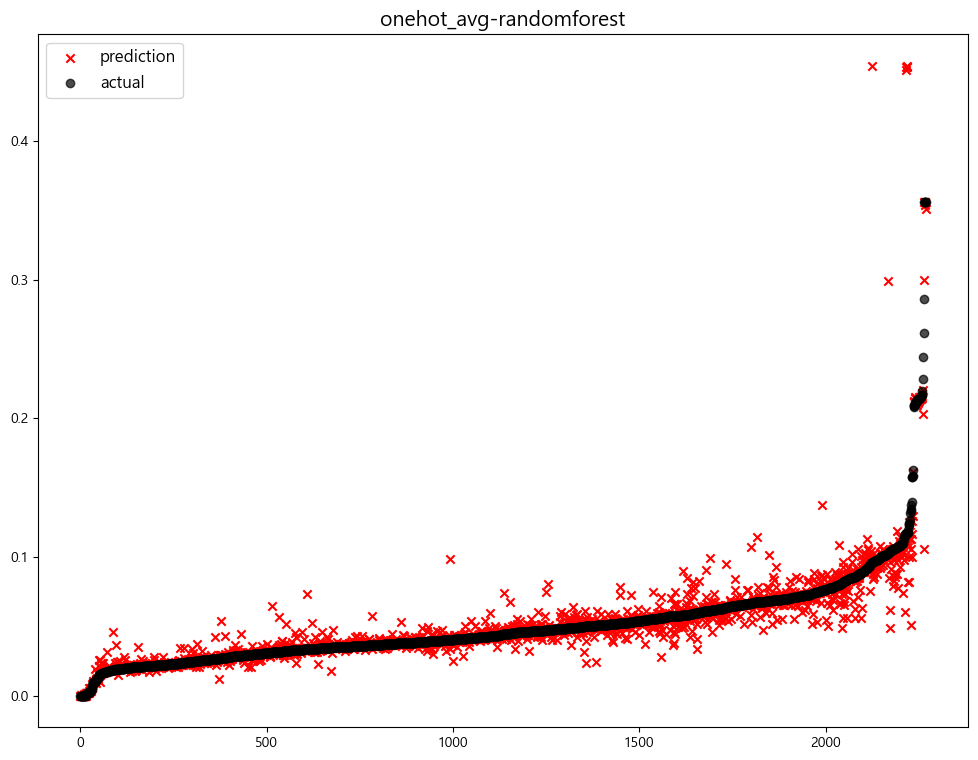

                     model       mse
0  onehot_avg-randomforest  0.000333


C:\Users\hw981\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


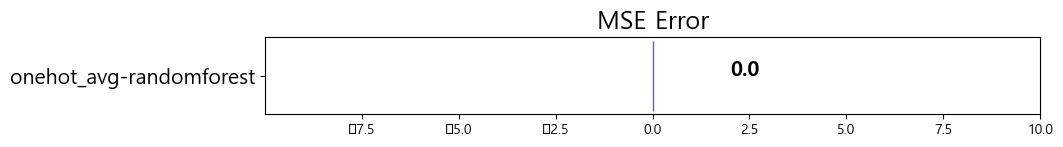

In [32]:
df_floor_onehot_x, df_floor_onehot_y_avg = split_xy(df_floor_onehot, 'onehot', 'avg')
print(df_floor_onehot_x.shape, df_floor_onehot_y_avg.shape)

train_x, test_x, train_y_avg, test_y_avg = train_test_split(df_floor_onehot_x, df_floor_onehot_y_avg, test_size=0.2, random_state=0, shuffle=True)
print(train_x.shape, test_x.shape, train_y_avg.shape, test_y_avg.shape)

model = RandomForestRegressor(random_state=0)
model.fit(train_x, train_y_avg)
predict_y_avg = model.predict(test_x)
regressor_metrics(test_y_avg, predict_y_avg)
mse_eval('onehot_avg-randomforest', predict_y_avg, test_y_avg)

(11349, 38) (11349,)
(9079, 38) (2270, 38) (9079,) (2270,)
MAE: 0.0025
MSE: 0.0001
RMSE: 0.0118
R2: 0.7669


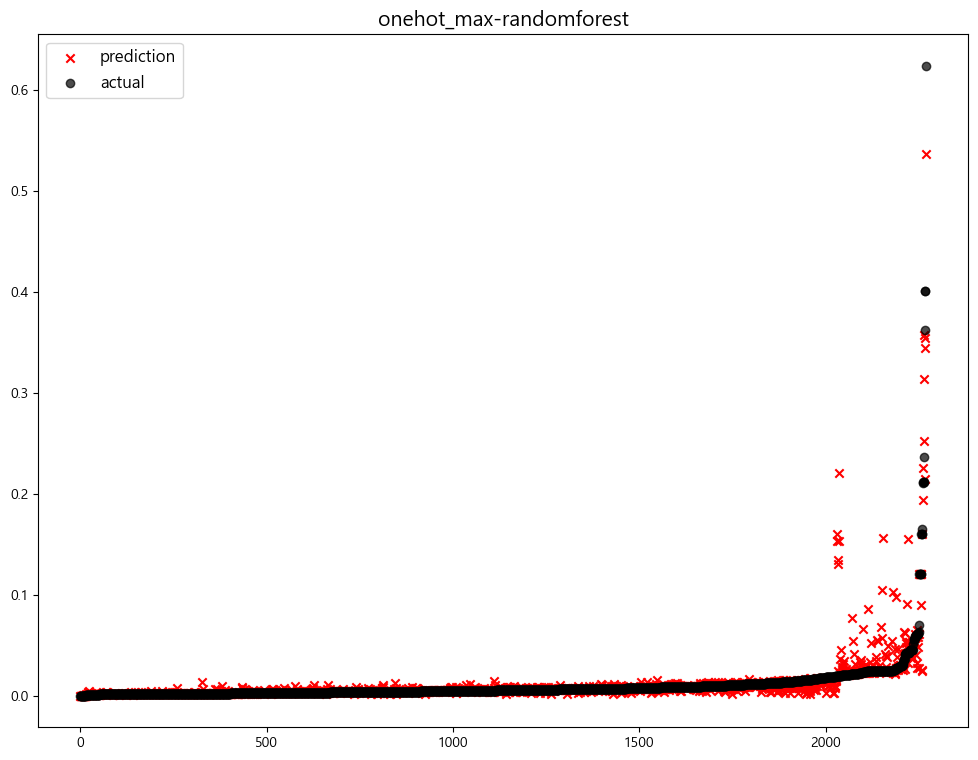

                     model       mse
0  onehot_avg-randomforest  0.000333
1  onehot_max-randomforest  0.000138


C:\Users\hw981\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


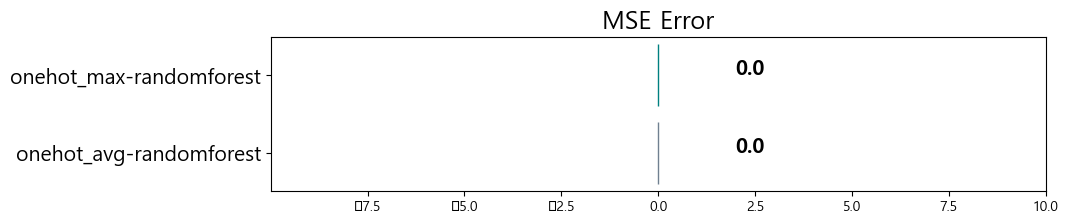

In [33]:
df_floor_onehot_x, df_floor_onehot_y_max = split_xy(df_floor_onehot, 'onehot', 'max')
print(df_floor_onehot_x.shape, df_floor_onehot_y_max.shape)

train_x, test_x, train_y_max, test_y_max = train_test_split(df_floor_onehot_x, df_floor_onehot_y_max, test_size=0.2, random_state=0, shuffle=True)
print(train_x.shape, test_x.shape, train_y_max.shape, test_y_max.shape)

model = RandomForestRegressor(random_state=0)
model.fit(train_x, train_y_max)
predict_y_max = model.predict(test_x)
regressor_metrics(test_y_max, predict_y_max)
mse_eval('onehot_max-randomforest', predict_y_max, test_y_max)

### label encoding - RandomforestRegressor

(11349, 15) (11349,)
(9079, 15) (2270, 15) (9079,) (2270,)
MAE: 0.0043
MSE: 0.0003
RMSE: 0.0181
R2: 0.7022


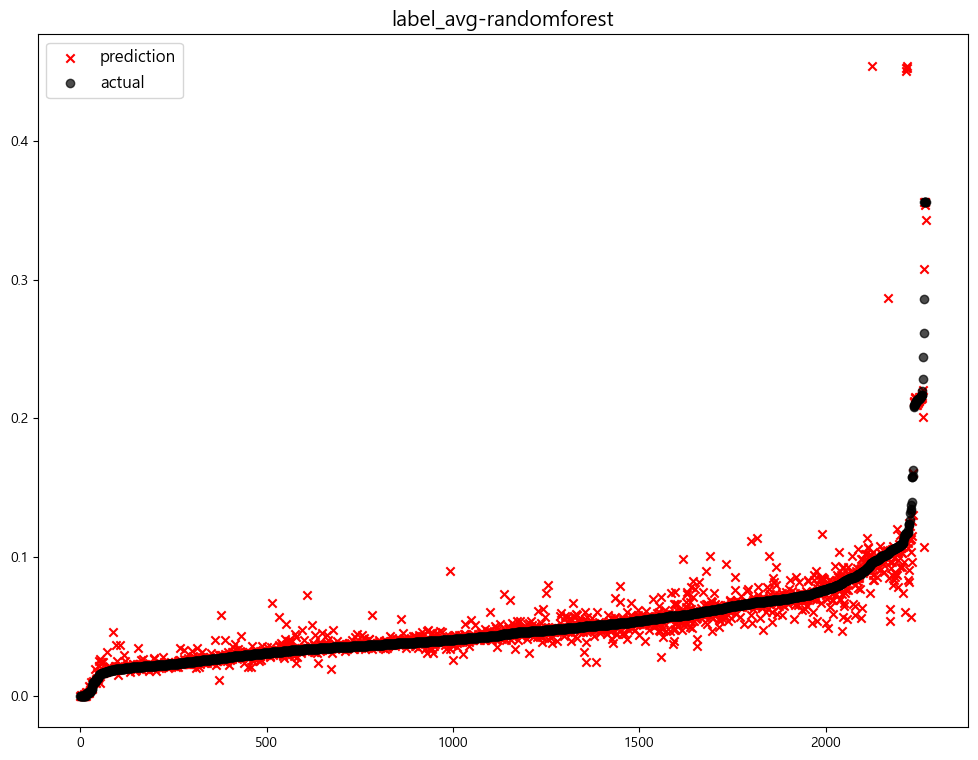

                     model       mse
0  onehot_avg-randomforest  0.000333
1   label_avg-randomforest  0.000329
2  onehot_max-randomforest  0.000138


C:\Users\hw981\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


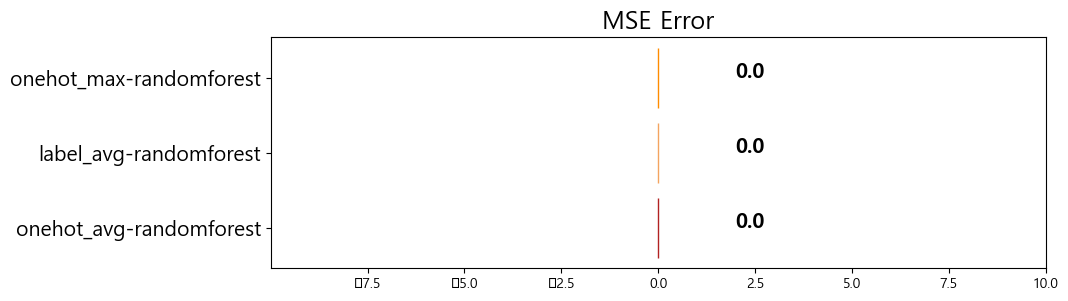

In [34]:
df_floor_label_x, df_floor_label_y_avg = split_xy(df_floor_label, 'label', 'avg')
print(df_floor_label_x.shape, df_floor_label_y_avg.shape)

train_x, test_x, train_y_avg, test_y_avg = train_test_split(df_floor_label_x, df_floor_label_y_avg, test_size=0.2, random_state=0, shuffle=True)
print(train_x.shape, test_x.shape, train_y_avg.shape, test_y_avg.shape)

model = RandomForestRegressor(random_state=0)
model.fit(train_x, train_y_avg)
predict_y_avg = model.predict(test_x)
regressor_metrics(test_y_avg, predict_y_avg)
mse_eval('label_avg-randomforest', predict_y_avg, test_y_avg)

(11349, 15) (11349,)
(9079, 15) (2270, 15) (9079,) (2270,)
MAE: 0.0024
MSE: 0.0001
RMSE: 0.0110
R2: 0.7966


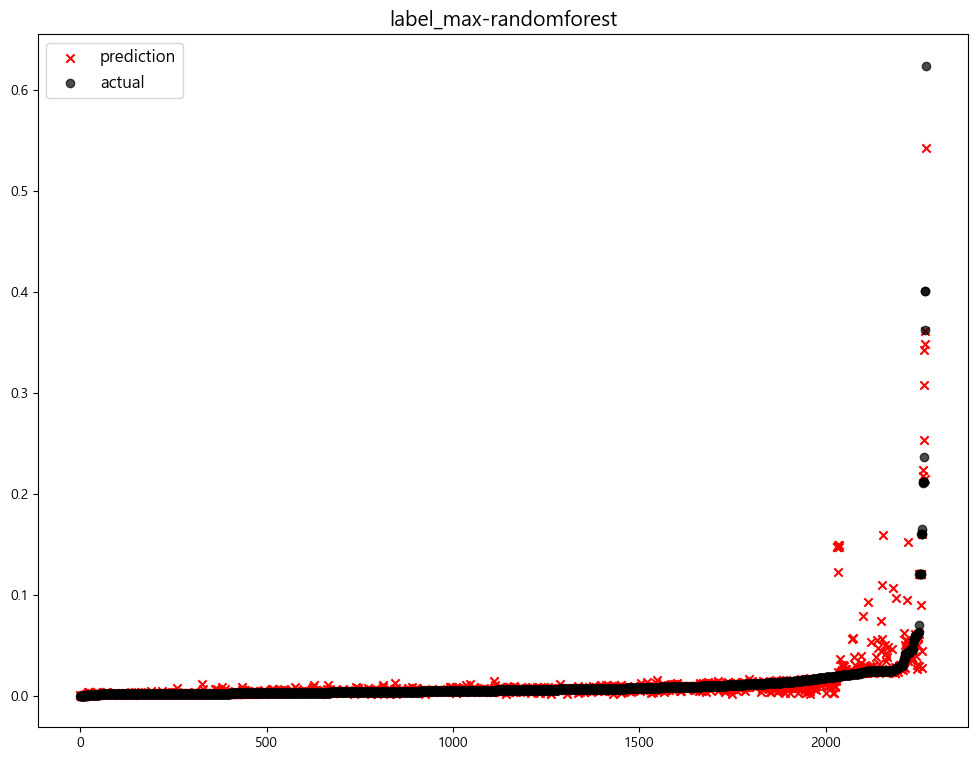

                     model       mse
0  onehot_avg-randomforest  0.000333
1   label_avg-randomforest  0.000329
2  onehot_max-randomforest  0.000138
3   label_max-randomforest  0.000121


C:\Users\hw981\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


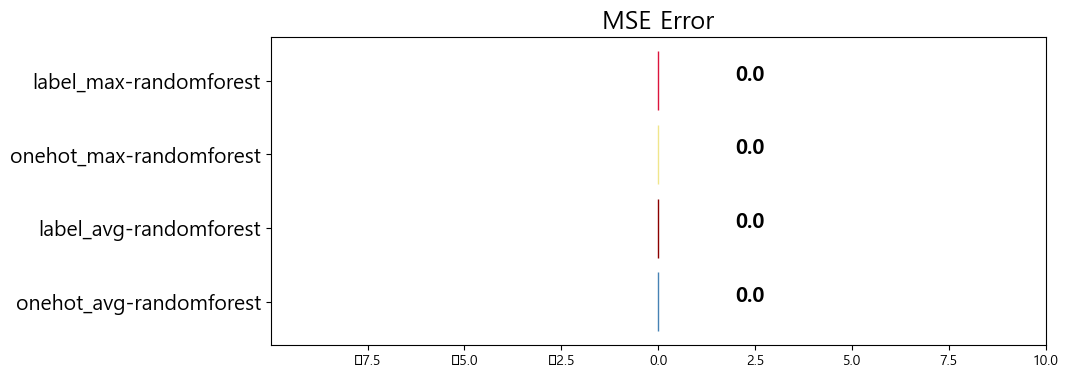

In [35]:
df_floor_label_x, df_floor_label_y_max = split_xy(df_floor_label, 'label', 'max')
print(df_floor_label_x.shape, df_floor_label_y_max.shape)

train_x, test_x, train_y_max, test_y_max = train_test_split(df_floor_label_x, df_floor_label_y_max, test_size=0.2, random_state=0, shuffle=True)
print(train_x.shape, test_x.shape, train_y_max.shape, test_y_max.shape)

model = RandomForestRegressor(random_state=0)
model.fit(train_x, train_y_max)
predict_y_max = model.predict(test_x)
regressor_metrics(test_y_max, predict_y_max)
mse_eval('label_max-randomforest', predict_y_max, test_y_max)